# Set Up

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

## Extra

# Data Collection/Preprocessing

## Collecting Data

In [3]:
data = pd.read_csv("../outputs/training_metadata.csv")

In [4]:
data.head()

,path,left,right,forward,backward,brake
0,outputs/training_data/10.jpeg,1,0,1,0,0
1,outputs/training_data/11.jpeg,1,0,1,0,0
2,outputs/training_data/12.jpeg,1,0,1,0,0
3,outputs/training_data/13.jpeg,1,0,1,0,0
4,outputs/training_data/14.jpeg,1,0,1,0,0


## Analyzing Data

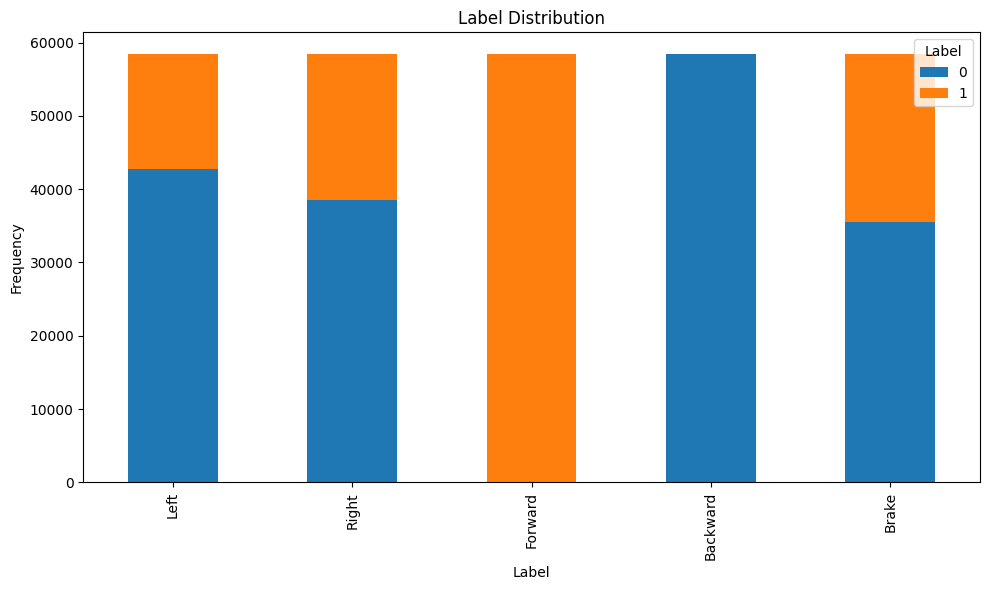

In [5]:
left_labels = data['left']
right_labels = data['right']
forward_labels = data['forward']
backward_labels = data['backward']
brake_labels = data['brake']

left_counts = left_labels.value_counts()
right_counts = right_labels.value_counts()
forward_counts = forward_labels.value_counts()
backward_counts = backward_labels.value_counts()
brake_counts = brake_labels.value_counts()

df = pd.DataFrame({
    'Left': left_counts,
    'Right': right_counts,
    'Forward': forward_counts,
    'Backward': backward_counts,
    'Brake': brake_counts
}).transpose()

# Plot the distribution of labels
fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Label Distribution')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
ax.legend(['0', '1'], title='Label')

plt.tight_layout()
plt.show()

## Preprocessing Data

In [6]:
def load_image(image_path):
    image = Image.open("../"+image_path)
    image = np.array(image)
    return image

In [7]:
data['path'][0]

'outputs/training_data/10.jpeg'

In [8]:
images = [load_image(image_path) for image_path in data['path']]
images = np.array(images)

In [9]:
targets = data[['left', 'right', 'forward', 'brake']].values

## Splitting Data

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(
    images, targets, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
len(X_train)

46776

In [12]:
len(X_test)

5847

In [14]:
sample_image_path = "../outputs/training_data/10.jpeg"
sample_image = Image.open(sample_image_path)
image_width, image_height = sample_image.size
num_channels = len(sample_image.getbands())

# Neural Network

## Model Set Up

In [15]:
optimizer = Adam(learning_rate=0.001)

In [16]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(
#         image_height, image_width, num_channels)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu',
#                   kernel_regularizer=regularizers.l2(0.0001)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu',
#                   kernel_regularizer=regularizers.l2(0.0001)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu',
#                  kernel_regularizer=regularizers.l2(0.0001)),
#     layers.Dropout(0.6),
#     layers.Dense(4, activation='sigmoid')
# ])

In [17]:
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(
        image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(40, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(4, activation='relu')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 40)                6

## Training Model

In [19]:
model.compile(optimizer=optimizer, loss='mse')

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10

1462/1462 [==============================] - 210s 143ms/step - loss: 4.3032 - val_loss: 0.1550
Epoch 2/10
1462/1462 [==============================] - 219s 150ms/step - loss: 0.1680 - val_loss: 0.1367
Epoch 3/10
1462/1462 [==============================] - 215s 147ms/step - loss: 0.1454 - val_loss: 0.1293
Epoch 4/10
1462/1462 [==============================] - 212s 145ms/step - loss: 0.1313 - val_loss: 0.1145
Epoch 5/10
1462/1462 [==============================] - 212s 145ms/step - loss: 0.1256 - val_loss: 0.1104
Epoch 6/10
1462/1462 [==============================] - 212s 145ms/step - loss: 0.1159 - val_loss: 0.0859
Epoch 7/10
1462/1462 [==============================] - 212s 145ms/step - loss: 0.1014 - val_loss: 0.0717
Epoch 8/10
1462/1462 [==============================] - 212s 145ms/step - loss: 0.0922 - val_loss: 0.0662
Epoch 9/10
1462/1462 [==============================] - 211s 144ms/step - loss: 0.0838 - val_loss: 0.0629
Epoch 10/10
1462/1462 [======================

## Testing Model

In [21]:
test_loss = model.evaluate(X_test, y_test)

183/183 [==============================] - 6s 34ms/step - loss: 0.0578


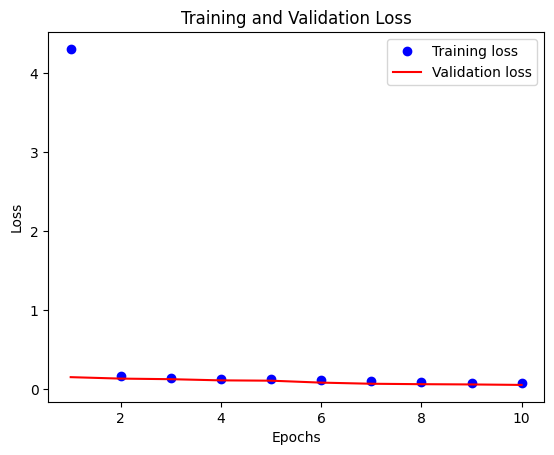

In [22]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

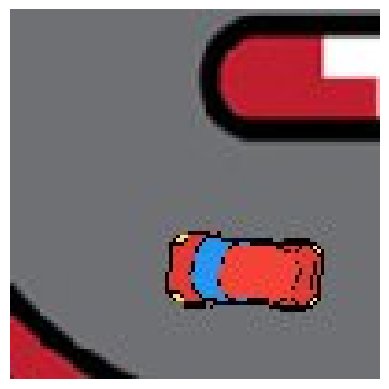

In [29]:
image = X_test[5]
plt.imshow(image)
plt.axis('off')
plt.show()

In [30]:
test_image = image.reshape(1, image_height, image_width, num_channels)
predictions = model.predict(test_image)
print(predictions)

1/1 [==============================] - 0s 20ms/step
[[0.7357709 0.        1.0008337 0.       ]]


## Prediction Distribution

In [25]:
predictions_list = []
for num in range(250):
    image = X_test[num]
    test_image = image.reshape(1, image_height, image_width, num_channels)
    prediction = model.predict(test_image)
    predictions_list.append(prediction)

1/1 [==============================] - 0s 18ms/step


In [26]:
predictions_list

[array([[0.24036932, 0.        , 1.0006965 , 0.5416725 ]], dtype=float32),
 array([[0.01945201, 0.70697427, 1.0018634 , 0.        ]], dtype=float32),
 array([[0.        , 0.47307062, 1.0007067 , 0.61987734]], dtype=float32),
 array([[0.       , 0.8778733, 1.0007823, 0.       ]], dtype=float32),
 array([[0.       , 0.7210833, 1.0025367, 0.       ]], dtype=float32),
 array([[0.7357709, 0.       , 1.0008337, 0.       ]], dtype=float32),
 array([[0.       , 1.0345273, 1.0022458, 0.       ]], dtype=float32),
 array([[0.99975693, 0.        , 1.1001735 , 0.        ]], dtype=float32),
 array([[0.        , 0.        , 1.0006669 , 0.74570656]], dtype=float32),
 array([[0.44616267, 0.47994316, 1.0022155 , 0.        ]], dtype=float32),
 array([[0.        , 0.3966643 , 1.0005484 , 0.55658287]], dtype=float32),
 array([[0.        , 0.        , 1.0014592 , 0.44928083]], dtype=float32),
 array([[0.3579247 , 0.52303725, 1.0015842 , 0.        ]], dtype=float32),
 array([[0.        , 0.        , 1.000565

In [27]:
for num in range(250):
    print(y_test[num])

[0 0 1 1]
[0 1 1 0]
[0 1 1 0]
[0 1 1 0]
[0 1 1 0]
[1 0 1 0]
[0 1 1 0]
[1 0 1 0]
[0 0 1 1]
[1 0 1 0]
[0 1 1 0]
[0 0 1 1]
[1 0 1 0]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 0 1 1]
[1 0 1 0]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 1 1 0]
[0 1 1 0]
[0 1 1 0]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[1 0 1 0]
[0 1 1 0]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[1 0 1 0]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 0 1 1]
[1 0 1 0]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 1 1 0]
[0 1 1 0]
[1 0 1 0]
[0 1 1 0]
[0 1 1 0]
[1 0 1 0]
[0 1 1 0]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 1 1 0]
[1 0 1 0]
[0 1 1 0]
[1 0 1 0]
[0 0 1 1]
[0 0 1 1]
[0 1 1 0]
[0 0 1 1]
[0 1 1 0]
[1 0 1 0]
[1 0 1 0]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[1 0 1 0]
[0 1 1 0]
[0 0 1 1]
[1 0 1 0]
[0 1 1 0]
[0 0 1 1]
[0 1 1 0]
[0 1 1 0]
[1 0 1 0]
[0 0 1 1]
[0 0 1 1]
[0 0 1 1]
[1 0 1 0]
[1 0 1 0]
[0 1 1 0]
[0 1 1 0]
[1 0 1 0]
[0 0 1 1]
[1 0 1 0]


## Saving Model Weights

In [28]:
model.save("../models/CNN_steering_model.h5")

c:\Users\andyx\Desktop\Projects\SelfDrivingCarSimulator\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
